In [1]:
import io

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

In [21]:
lines = ""
for n in range(7):
    fname = "results/fast/strong-{}.slurmout".format(2**n)
    line = ""
    with open(fname, 'r') as f:
        while True:
            last = line
            line = f.readline()
            # print("last:", last)
            # print("line:", line)
            if not line:
                break

        # f.readline()
        # f.readline()
        # if n > 0:
        #     # parallel has an extra line of output before the data
        #     f.readline()
        lines += last
        
print(lines)

mpirun: Forwarding signal 18 to job
mpirun: Forwarding signal 18 to job
[r001:39737] Set MCA parameter "orte_base_help_aggregate" to 0 to see all help / error messages
[r001:39485] Set MCA parameter "orte_base_help_aggregate" to 0 to see all help / error messages
[r001:39614] Set MCA parameter "orte_base_help_aggregate" to 0 to see all help / error messages
[r001:39734] Set MCA parameter "orte_base_help_aggregate" to 0 to see all help / error messages
64	1000	1000	10	5	petsc	38.31630849838257	89.93646121025085	141.25938034057617	192.72052597999573	244.31098246574402	295.65907430648804	347.3610770702362	399.07652020454407	451.0602240562439	502.7990846633911	554.6047501564026



In [114]:
# df = pd.read_csv(io.StringIO(lines), delimiter="\t", skiprows=2,
#                  names=(["nproc", "dx", "dy", "steps", "sweeps", "solver", "setup"] 
#                         + ["elapsed{}".format(n) for n in range(10)]))
#                  # index_col="nproc")
df = pd.read_csv("results/fast/cahn_hilliard.py.tsv", delimiter="\t", index_col=False)

df

/var/folders/yc/1ssnjn654bs1n_0rts218cn0000j9v/T/ipykernel_82450/2772825711.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv("results/fast/cahn_hilliard.py.tsv", delimiter="\t", index_col=False)


,nproc,nx,ny,steps,sweeps,solver,elapsed0,elapsed1,elapsed2,elapsed3,elapsed4,elapsed5,elapsed6,elapsed7,elapsed8,elapsed9
0,4,10,10,10,5,petsc,2.100985,2.429331,2.729084,2.966225,3.249054,3.494141,3.746356,3.973697,4.199421,4.422478
1,1,10,10,10,5,petsc,2.308931,2.722743,3.050777,3.358134,3.663761,3.969912,4.269095,4.566219,4.868304,5.168905
2,2,10,10,10,5,petsc,2.330669,2.795789,3.173659,3.531903,3.894680,4.251227,4.604335,4.962843,5.327380,5.687954
3,8,10,10,10,5,petsc,1.384888,1.741388,1.997257,2.250359,2.495973,2.741729,3.026412,3.459613,3.875906,4.239695
4,16,10,10,10,5,petsc,1.499459,1.887994,2.349164,2.809113,3.209167,3.621107,4.018319,4.407135,4.807630,5.210971
5,2,10,10,10,5,petsc,1.230675,1.523732,1.747988,1.975618,2.180376,2.382931,2.585392,2.787250,2.989082,3.190541
6,4,10,10,10,5,petsc,1.056553,1.367906,1.601762,1.836058,2.052174,2.270311,2.491863,2.710012,2.927854,3.145087
7,8,10,10,10,5,petsc,1.091310,1.422599,1.674218,1.926014,2.173780,2.421993,2.669566,2.916378,3.164409,3.411972
8,16,10,10,10,5,petsc,1.009650,1.343002,1.613948,1.882229,2.151179,2.419186,2.687468,2.957479,3.227446,3.495845
9,16,10,10,10,5,petsc,4.899467,5.301117,5.586967,5.870491,6.147069,6.423133,6.701917,6.979275,7.257681,7.535319


In [36]:
for n in range(1,10):
    df[f"delta{n}"] = df[f"elapsed{n}"] - df[f"elapsed{n-1}"]

In [89]:
where = (df["nx"] == 125) & (df["ny"] == 125)
df.loc[where]

,nproc,nx,ny,steps,sweeps,solver,elapsed0,elapsed1,elapsed2,elapsed3,elapsed4,elapsed5,elapsed6,elapsed7,elapsed8,elapsed9,speedup
22,64,125,125,10,5,petsc,4.404802,5.317862,6.098528,6.924580,7.723239,8.511597,9.298380,10.084540,10.872036,11.657091,4.086226
25,32,125,125,10,5,petsc,3.171659,3.818962,4.425584,5.026881,5.621874,6.218511,6.815445,7.412595,8.008818,8.604977,5.535576
28,16,125,125,10,5,petsc,2.616411,3.448294,4.167379,4.872721,5.574957,6.276559,6.984979,7.686778,8.388574,9.151058,5.205246
31,8,125,125,10,5,petsc,1.474892,2.589494,3.616752,4.646397,5.672669,6.699574,7.727492,8.756697,9.782815,10.807881,4.407294
34,4,125,125,10,5,petsc,1.670761,3.538732,5.197370,6.841424,8.484598,10.126453,11.769412,13.408417,15.058967,16.718497,2.849150
38,2,125,125,10,5,petsc,1.300218,4.366030,7.318439,10.272417,13.227316,16.183899,19.158379,22.148038,25.135775,28.121739,1.693832
40,1,125,125,10,5,petsc,1.404970,6.613085,11.741949,16.867585,21.995465,27.124108,32.254807,37.381750,42.509665,47.633507,1.000000


In [86]:
t1 = df.loc[where & (df["nproc"] == 1), "elapsed9"].iloc[0]
df.loc[where, "speedup"] = t1 / df.loc[where, "elapsed9"] 
df

,nproc,nx,ny,steps,sweeps,solver,elapsed0,elapsed1,elapsed2,elapsed3,elapsed4,elapsed5,elapsed6,elapsed7,elapsed8,elapsed9,speedup
0,4,10,10,10,5,petsc,2.100985,2.429331,2.729084,2.966225,3.249054,3.494141,3.746356,3.973697,4.199421,4.422478,NaN
1,1,10,10,10,5,petsc,2.308931,2.722743,3.050777,3.358134,3.663761,3.969912,4.269095,4.566219,4.868304,5.168905,NaN
2,2,10,10,10,5,petsc,2.330669,2.795789,3.173659,3.531903,3.894680,4.251227,4.604335,4.962843,5.327380,5.687954,NaN
3,8,10,10,10,5,petsc,1.384888,1.741388,1.997257,2.250359,2.495973,2.741729,3.026412,3.459613,3.875906,4.239695,NaN
4,16,10,10,10,5,petsc,1.499459,1.887994,2.349164,2.809113,3.209167,3.621107,4.018319,4.407135,4.807630,5.210971,NaN
5,2,10,10,10,5,petsc,1.230675,1.523732,1.747988,1.975618,2.180376,2.382931,2.585392,2.787250,2.989082,3.190541,NaN
6,4,10,10,10,5,petsc,1.056553,1.367906,1.601762,1.836058,2.052174,2.270311,2.491863,2.710012,2.927854,3.145087,NaN
7,8,10,10,10,5,petsc,1.091310,1.422599,1.674218,1.926014,2.173780,2.421993,2.669566,2.916378,3.164409,3.411972,NaN
8,16,10,10,10,5,petsc,1.009650,1.343002,1.613948,1.882229,2.151179,2.419186,2.687468,2.957479,3.227446,3.495845,NaN
9,16,10,10,10,5,petsc,4.899467,5.301117,5.586967,5.870491,6.147069,6.423133,6.701917,6.979275,7.257681,7.535319,NaN


In [9]:
def amdahl(n, s):
    return 1 / (s + (1 - s) / n)

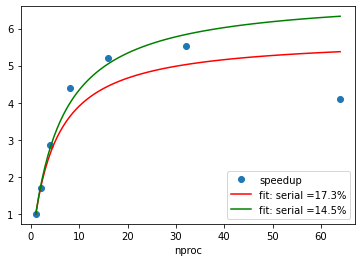

In [90]:
df2 = df.loc[where]

ndata = np.linspace(1, 64, 100)
ax = df2.plot(x="nproc", y="speedup", marker="o", linestyle="")
popt, pcov = curve_fit(amdahl, df2["nproc"], df2["speedup"])
ax.plot(ndata, amdahl(ndata, *popt), 'r-', label="fit: serial ={:5.1%}".format(*popt))
popt, pcov = curve_fit(amdahl, df2[df2["nproc"] < 64]["nproc"], df2[df2["nproc"] < 64]["speedup"])
ax.plot(ndata, amdahl(ndata, *popt), 'g-', label="fit: serial ={:5.1%}".format(*popt))
plt.legend()

In [38]:
import os

In [91]:
df["weak_size"] = df["nx"] * df["ny"] / df["nproc"]

In [92]:
df

,nproc,nx,ny,steps,sweeps,solver,elapsed0,elapsed1,elapsed2,elapsed3,elapsed4,elapsed5,elapsed6,elapsed7,elapsed8,elapsed9,speedup,weak_size
0,4,10,10,10,5,petsc,2.100985,2.429331,2.729084,2.966225,3.249054,3.494141,3.746356,3.973697,4.199421,4.422478,NaN,25.000000
1,1,10,10,10,5,petsc,2.308931,2.722743,3.050777,3.358134,3.663761,3.969912,4.269095,4.566219,4.868304,5.168905,NaN,100.000000
2,2,10,10,10,5,petsc,2.330669,2.795789,3.173659,3.531903,3.894680,4.251227,4.604335,4.962843,5.327380,5.687954,NaN,50.000000
3,8,10,10,10,5,petsc,1.384888,1.741388,1.997257,2.250359,2.495973,2.741729,3.026412,3.459613,3.875906,4.239695,NaN,12.500000
4,16,10,10,10,5,petsc,1.499459,1.887994,2.349164,2.809113,3.209167,3.621107,4.018319,4.407135,4.807630,5.210971,NaN,6.250000
5,2,10,10,10,5,petsc,1.230675,1.523732,1.747988,1.975618,2.180376,2.382931,2.585392,2.787250,2.989082,3.190541,NaN,50.000000
6,4,10,10,10,5,petsc,1.056553,1.367906,1.601762,1.836058,2.052174,2.270311,2.491863,2.710012,2.927854,3.145087,NaN,25.000000
7,8,10,10,10,5,petsc,1.091310,1.422599,1.674218,1.926014,2.173780,2.421993,2.669566,2.916378,3.164409,3.411972,NaN,12.500000
8,16,10,10,10,5,petsc,1.009650,1.343002,1.613948,1.882229,2.151179,2.419186,2.687468,2.957479,3.227446,3.495845,NaN,6.250000
9,16,10,10,10,5,petsc,4.899467,5.301117,5.586967,5.870491,6.147069,6.423133,6.701917,6.979275,7.257681,7.535319,NaN,6.250000


In [94]:
gr = df.groupby("weak_size")

In [98]:
dict((k, len(g)) for k, g in gr.groups.items())

{6.25: 3,
 12.5: 3,
 25.0: 3,
 50.0: 3,
 100.0: 2,
 244.140625: 1,
 488.28125: 1,
 976.5625: 2,
 1953.125: 2,
 3906.25: 3,
 7812.5: 3,
 15625.0: 4,
 31250.0: 3,
 62500.0: 3,
 125000.0: 2,
 250000.0: 2,
 500000.0: 1}

In [99]:
125 ** 2

15625

In [101]:
gr.groups[15625.0]

Int64Index([14, 26, 33, 40], dtype='int64')

In [103]:
weak_125 = gr.get_group(15625.0).copy()
weak_125

,nproc,nx,ny,steps,sweeps,solver,elapsed0,elapsed1,elapsed2,elapsed3,elapsed4,elapsed5,elapsed6,elapsed7,elapsed8,elapsed9,speedup,weak_size
14,64,1000,1000,10,5,petsc,36.925680,89.800555,142.656739,195.606111,248.334031,301.194829,354.061018,406.947136,460.082807,513.085927,NaN,15625.0
26,16,500,500,10,5,petsc,7.367905,18.607954,29.680096,40.737801,51.797689,62.855137,73.918662,84.983271,96.047038,107.270351,9.989597,15625.0
33,4,250,250,10,5,petsc,2.808435,8.819026,14.688680,20.727394,26.821842,32.856632,38.787328,44.651203,50.507956,56.439248,3.373619,15625.0
40,1,125,125,10,5,petsc,1.404970,6.613085,11.741949,16.867585,21.995465,27.124108,32.254807,37.381750,42.509665,47.633507,1.000000,15625.0


In [110]:
weak_125["speedup"] = weak_125.loc[weak_125["nproc"] == 1, "elapsed9"].iloc[0] / weak_125["elapsed9"]

In [111]:
weak_125

,nproc,nx,ny,steps,sweeps,solver,elapsed0,elapsed1,elapsed2,elapsed3,elapsed4,elapsed5,elapsed6,elapsed7,elapsed8,elapsed9,speedup,weak_size
14,64,1000,1000,10,5,petsc,36.925680,89.800555,142.656739,195.606111,248.334031,301.194829,354.061018,406.947136,460.082807,513.085927,0.092837,15625.0
26,16,500,500,10,5,petsc,7.367905,18.607954,29.680096,40.737801,51.797689,62.855137,73.918662,84.983271,96.047038,107.270351,0.444051,15625.0
33,4,250,250,10,5,petsc,2.808435,8.819026,14.688680,20.727394,26.821842,32.856632,38.787328,44.651203,50.507956,56.439248,0.843978,15625.0
40,1,125,125,10,5,petsc,1.404970,6.613085,11.741949,16.867585,21.995465,27.124108,32.254807,37.381750,42.509665,47.633507,1.000000,15625.0


In [109]:
weak_125.loc[weak_125["nproc"] == 1, "elapsed9"].iloc[0] / weak_125["elapsed9"]

14    0.092837
26    0.444051
33    0.843978
40    1.000000
Name: elapsed9, dtype: float64

In [112]:
1000 * 1000 / 64

15625.0

<AxesSubplot:xlabel='nproc'>

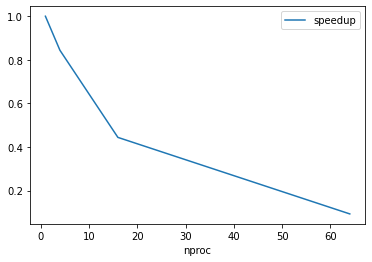

In [113]:
weak_125.plot("nproc", "speedup")

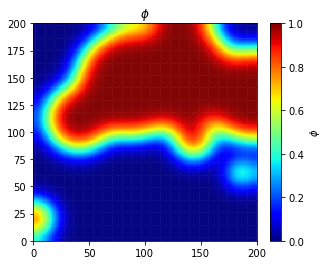

200	200	10	5	petsc	2.220182180404663	3.0950019359588623	3.9296798706054688	4.770771026611328	5.61898398399353	6.457387208938599	7.297537088394165	8.155791997909546	8.990701913833618	9.825934886932373	10.672209024429321


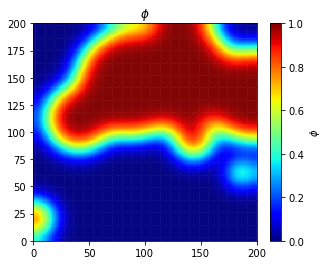

In [125]:
%run diffusion.py --nx=200 --ny=200

In [122]:
np.random.random(3)

array([0.24122968, 0.07533274, 0.6206377 ])